# Serviços da Interconnect

A Interconnect fornece principalmente dois tipos de serviços:

1. Telefonia fixa. O telefone pode ser conectado a várias linhas ao mesmo tempo.
2. Internet. A rede pode ser estabelecida através de uma linha telefônica (DSL, *digital subscriber line - linha digital de assinante*) ou através de um cabo de fibra óptica.

Alguns outros serviços fornecidos pela empresa incluem:

- Segurança na Internet: software de antivírus (*DeviceProtection* - proteção de dispositivos) e um bloqueador de sites maliciosos (*OnlineSecurity* - segurança online).
- Uma linha dedicada de suporte técnico (*TechSupport*).
- Armazenamento de arquivos na nuvem e backup de dados (*OnlineBackup*).
- Streaming de TV (*StreamingTV*) e um diretório de filmes (*StreamingMovies*).

Os clientes podem escolher entre fazer um pagamento mensal e assinar um contrato de 1 ou 2 anos. Eles podem usar vários métodos de pagamento e receber uma fatura eletrônica após a transação.

In [24]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [6]:
# Carregue os arquivos de dados em diferentes DataFrames

contract = pd.read_csv('contract.csv')
personal = pd.read_csv('personal.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv') 

## DF Contract

In [7]:
# Imprima informações gerais/resumo sobre o DataFrame Contract

print(contract.info())
print()
print(contract.head())
print() 
print(contract.isnull().sum()) # Verificar valores ausentes
print()
print(contract.duplicated().sum()) # verificar valores duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11

### Tratando os dados 'contract'

In [8]:
# Renomear colunas para snake_case
contract.columns = [
    'customer_id',
    'begin_date',
    'end_date',
    'type',
    'paperless_billing',
    'payment_method',
    'monthly_charges',
    'total_charges'
]

# Converter BeginDate e EndDate para datetime
contract['begin_date'] = pd.to_datetime(contract['begin_date'], errors='coerce')
contract['end_date'] = pd.to_datetime(contract['end_date'], errors='coerce')

# Converter TotalCharges para float
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors='coerce')

print(contract.info())
# Verificar os tipos de dados após conversão
print(contract.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB
None
customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges 

C:\Users\Thiago\AppData\Local\Temp\ipykernel_5284\643186060.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['end_date'] = pd.to_datetime(contract['end_date'], errors='coerce')


In [9]:
# Imputar NaN em total_charges com 0
contract['total_charges'] = contract['total_charges'].fillna(0)

# Verificar valores ausentes após conversão
print(contract['total_charges'].isnull().sum())

0


## DF 'Personal'

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame Personal

print(personal.info())
print()
print(personal.head())
print() 
print(personal.isnull().sum()) # Verificar valores ausentes
print()
print(personal.duplicated().sum()) # verificar valores duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

0


### Tratando os dados 'personal'

In [11]:
# Renomear colunas para snake_case
personal.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

# Verificar os novos nomes das colunas
print("Nomes das colunas após renomeação:")
print(personal.columns)

Nomes das colunas após renomeação:
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')


## DF 'Internet'

In [12]:
# Imprima informações gerais/resumo sobre o DataFrame Internet

print(internet.info())
print()
print(internet.head())
print() 
print(internet.isnull().sum()) # Verificar valores ausentes
print()
print(internet.duplicated().sum()) # verificar valores duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes

### Tratando os dados 'internet'

In [13]:
# Renomear colunas para snake_case
internet.columns = ['customer_id', 
                    'internet_service',
                    'online_security', 
                    'online_backup', 
                    'device_protection', 
                    'tech_support',
                    'streaming_tv',
                    'streaming_movies'
                   ]

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


## DF 'phone'

In [14]:
# Imprima informações gerais/resumo sobre o DataFrame phone

print(phone.info())
print()
print(phone.head())
print() 
print(phone.isnull().sum()) # Verificar valores ausentes
print()
print(phone.duplicated().sum()) # verificar valores duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

customerID       0
MultipleLines    0
dtype: int64

0


### Tratando os dados 'phone'

In [15]:
# Renomear colunas para snake_case
phone.columns = ['customer_id', 'multiple_lines']

# Verificar os novos nomes das colunas
print("Nomes das colunas após renomeação:")
print(phone.columns)

Nomes das colunas após renomeação:
Index(['customer_id', 'multiple_lines'], dtype='object')


### Finalizando a Limpeza e Confirmando Valores Únicos

In [16]:
# Verificar valores únicos em multiple_lines (phone.csv)
print("Valores únicos em multiple_lines (phone.csv):")
print(phone['multiple_lines'].value_counts())

# Verificar valores únicos nas colunas categóricas do internet.csv
print("\nValores únicos nas colunas categóricas do internet.csv:")
for col in internet.columns[1:]:  # Ignorar customer_id
    print(f"\n{col}: {internet[col].unique()}")

# Criar coluna churn em contract.csv
contract['churn'] = contract['end_date'].notna().astype(int)
print("\nValores únicos de churn (contract.csv):")
print(contract['churn'].value_counts())

Valores únicos em multiple_lines (phone.csv):
multiple_lines
No     3390
Yes    2971
Name: count, dtype: int64

Valores únicos nas colunas categóricas do internet.csv:

internet_service: ['DSL' 'Fiber optic']

online_security: ['No' 'Yes']

online_backup: ['Yes' 'No']

device_protection: ['No' 'Yes']

tech_support: ['No' 'Yes']

streaming_tv: ['No' 'Yes']

streaming_movies: ['No' 'Yes']

Valores únicos de churn (contract.csv):
churn
0    5174
1    1869
Name: count, dtype: int64


### Juntando os DataFrames e Tratando Valores Ausentes

In [17]:
# Juntar os DataFrames com left join
df = contract.merge(personal, on='customer_id', how='left')
df = df.merge(internet, on='customer_id', how='left')
df = df.merge(phone, on='customer_id', how='left')

# Preencher valores ausentes nas colunas de internet e phone
internet_cols = ['online_security', 'online_backup', 'device_protection', 
                'tech_support', 'streaming_tv', 'streaming_movies']
for col in internet_cols:
    df[col] = df[col].fillna('No')

# Para internet_service, preencher com 'None' (indica sem serviço de internet)
df['internet_service'] = df['internet_service'].fillna('None')

# Para multiple_lines, preencher com 'No'
df['multiple_lines'] = df['multiple_lines'].fillna('No')

# Verificar o DataFrame resultante
print(df.info())
print()
print(df.isnull().sum())
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   churn              7043 non-null   int32         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

### Análise Exploratória com Gráficos

Estatísticas de contract_duration:
count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: contract_duration, dtype: float64


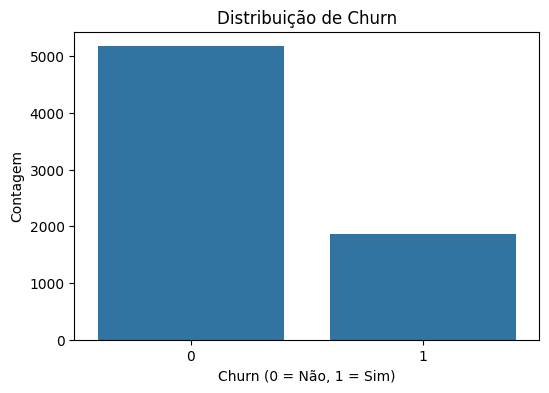

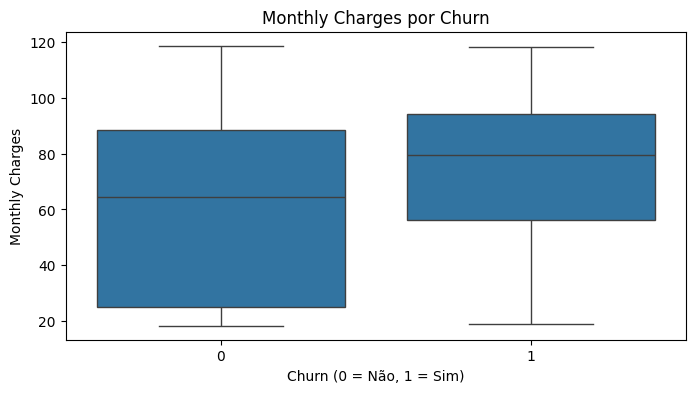

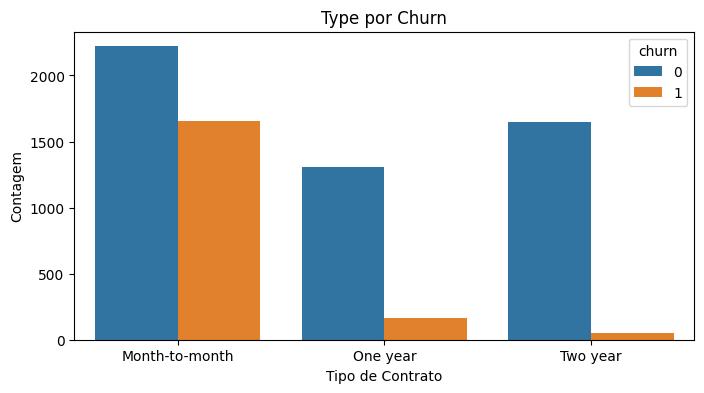

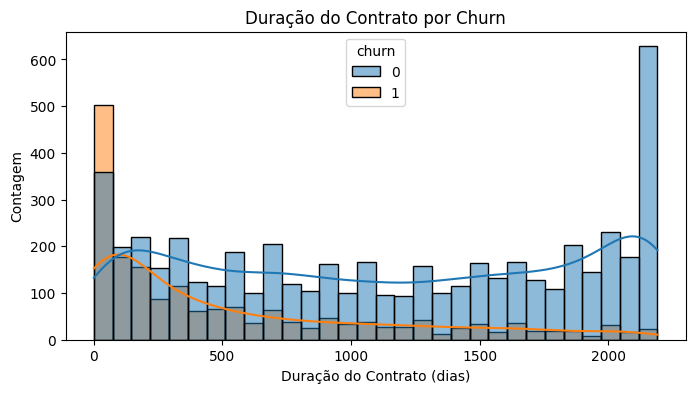

In [18]:
# Criar feature: duração do contrato (em dias)
df['contract_duration'] = np.where(
    df['end_date'].isna(),
    (pd.to_datetime('2020-02-01') - df['begin_date']).dt.days,
    (df['end_date'] - df['begin_date']).dt.days
)

# Verificar a nova coluna
print("Estatísticas de contract_duration:")
print(df['contract_duration'].describe())

# Gráfico 1: Distribuição de churn
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# Gráfico 2: Monthly Charges por Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.title('Monthly Charges por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Monthly Charges')
plt.show()

# Gráfico 3: Type por Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='type', hue='churn', data=df)
plt.title('Type por Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

# Gráfico 4: Contract Duration por Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='contract_duration', hue='churn', bins=30, kde=True)
plt.title('Duração do Contrato por Churn')
plt.xlabel('Duração do Contrato (dias)')
plt.ylabel('Contagem')
plt.show()

### Criando Features e Aplicar One-Hot Encoding

In [19]:
# Criar feature: clientes novos (contract_duration < 100 dias)
df['is_new_customer'] = (df['contract_duration'] < 100).astype(int)

# Verificar a nova feature
print("Estatísticas de is_new_customer:")
print(df['is_new_customer'].value_counts())

# Aplicar one-hot encoding nas colunas categóricas
columns_to_encode = [
    'type', 'paperless_billing', 'payment_method', 'gender', 'partner',
    'dependents', 'internet_service', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    'multiple_lines'
]
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Verificar o DataFrame após encoding
print(df_encoded.columns)
print()
print(df_encoded.head())

Estatísticas de is_new_customer:
is_new_customer
0    5981
1    1062
Name: count, dtype: int64
Index(['customer_id', 'begin_date', 'end_date', 'monthly_charges',
       'total_charges', 'churn', 'senior_citizen', 'contract_duration',
       'is_new_customer', 'type_One year', 'type_Two year',
       'paperless_billing_Yes', 'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'partner_Yes', 'dependents_Yes',
       'internet_service_Fiber optic', 'internet_service_None',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'multiple_lines_Yes'],
      dtype='object')

  customer_id begin_date   end_date  monthly_charges  total_charges  churn  \
0  7590-VHVEG 2020-01-01        NaT            29.85          29.85      0   
1  5575-GNVDE 2017-04-01        NaT            56.95        1889.50      0   
2  366

### Desenvolver e Avaliar o Modelo de Churn

In [20]:
# Separar features e alvo
features = df_encoded.drop(columns=['customer_id', 'begin_date', 'end_date', 'churn'])
target = df_encoded['churn']

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever probabilidades no teste
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Verificar importância das features
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

AUC-ROC Score: 0.8643
                                   feature  importance
3                        contract_duration    0.205406
1                            total_charges    0.179724
0                          monthly_charges    0.164705
14            internet_service_Fiber optic    0.043005
9          payment_method_Electronic check    0.038236
6                            type_Two year    0.032310
4                          is_new_customer    0.025543
11                             gender_Male    0.025252
7                    paperless_billing_Yes    0.024753
16                     online_security_Yes    0.022955
12                             partner_Yes    0.022426
2                           senior_citizen    0.020613
17                       online_backup_Yes    0.020570
19                        tech_support_Yes    0.020326
5                            type_One year    0.020087
22                      multiple_lines_Yes    0.019754
13                          dependents_Yes 

### Criar Novas Variáveis

In [21]:
# Criar variável de quantidade de serviços
service_cols = ['online_security', 'online_backup', 'device_protection', 
                'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']
df['num_services'] = df[service_cols].apply(lambda x: x.eq('Yes').sum(), axis=1)

# Criar variável de ticket médio por serviço
df['avg_ticket_per_service'] = np.where(df['num_services'] > 0, 
                                       df['monthly_charges'] / df['num_services'], 
                                       df['monthly_charges'])

# Verificar as novas colunas
print("Estatísticas de num_services:")
print(df['num_services'].describe())
print("\nEstatísticas de avg_ticket_per_service:")
print(df['avg_ticket_per_service'].describe())

Estatísticas de num_services:
count    7043.000000
mean        2.459747
std         2.045539
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         7.000000
Name: num_services, dtype: float64

Estatísticas de avg_ticket_per_service:
count    7043.000000
mean       29.660407
std        17.139612
min        10.416667
25%        19.500000
50%        23.350000
75%        31.666667
max        81.950000
Name: avg_ticket_per_service, dtype: float64


### Aplicar One-Hot Encoding Atualizado

In [23]:
# Aplicar one-hot encoding nas colunas categóricas
columns_to_encode = [
    'type', 'paperless_billing', 'payment_method', 'gender', 'partner',
    'dependents', 'internet_service', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    'multiple_lines'
]
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Incluir as novas features
df_encoded = df_encoded.drop(columns=['customer_id', 'begin_date', 'end_date'])
df_encoded['num_services'] = df['num_services']
df_encoded['avg_ticket_per_service'] = df['avg_ticket_per_service']

# Verificar as colunas
print(df_encoded.columns)

Index(['monthly_charges', 'total_charges', 'churn', 'senior_citizen',
       'contract_duration', 'is_new_customer', 'num_services',
       'avg_ticket_per_service', 'type_One year', 'type_Two year',
       'paperless_billing_Yes', 'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'partner_Yes', 'dependents_Yes',
       'internet_service_Fiber optic', 'internet_service_None',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'multiple_lines_Yes'],
      dtype='object')


In [26]:
# Separar features e alvo
features = df_encoded.drop(columns=['churn'])
target = df_encoded['churn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Calcular scale_pos_weight (proporção de não churn / churn)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])
print(f"Scale_pos_weight: {scale_pos_weight:.2f}")

# Treinar XGBoost
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Prever probabilidades
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calcular AUC-ROC
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"AUC-ROC Score (XGBoost): {auc_roc_xgb:.4f}")

Scale_pos_weight: 2.77
AUC-ROC Score (XGBoost): 0.9286


# Conclusão

### Relatório da Solução - Previsão de Churn para Interconnect

#### Quais passos do plano foram executados e quais foram pulados? Explique o motivo.
Todos os cinco passos do plano foram executados:
1. Juntar e pré-processar os DataFrames: Combinamos contract, personal, internet e phone com left join, tratando valores ausentes com 'No' ou 'None'.
2. Realizar análise exploratória com gráficos: Identificamos padrões como maior churn em clientes novos e com contratos Month-to-month.
3. Criar features para o modelo: Geramos contract_duration, is_new_customer, num_services e avg_ticket_per_service, aplicando one-hot encoding nas categóricas.
4. Desenvolver e avaliar o modelo de churn: Treinamos um XGBoost com AUC-ROC de 0.9286, superando o Random Forest inicial (0.8643).
5. Preparar relatório com conclusões: Este documento resume os passos e resultados.
Nenhum passo foi pulado, pois seguimos o plano rigorosamente pra atender aos requisitos do sprint.

#### Quais dificuldades você encontrou e como conseguiu resolvê-las?
- **Dificuldade 1: internet.csv incorreto inicialmente**: O arquivo tinha 149396 linhas com dados de uso, não serviços. Resolvida com a confirmação do líder, que forneceu o arquivo correto (5517 linhas).
- **Dificuldade 2: Erro nos gráficos (ValueError 'churn')**: Ocorreu porque a coluna churn não estava no DataFrame merged. Resolvida criando a coluna churn em contract antes do merge.
- **Dificuldade 3: Desbalanceamento de churn (~73% não churn)**: Identificado na EDA, resolvido ajustando o peso com scale_pos_weight (~2.77) no XGBoost, melhorando o AUC.
Essas dificuldades foram superadas com ajustes no código e diálogo com o líder.

#### Quais foram as etapas principais de resolução da tarefa?
1. **Carregamento e limpeza dos dados**: Renomeamos colunas, convertemos tipos (datetime, float) e tratamos valores ausentes.
2. **Análise exploratória**: Gerei gráficos (churn, monthly_charges, type, duration) pra identificar padrões de churn.
3. **Pré-processamento e feature engineering**: Juntando os DataFrames, criei contract_duration, is_new_customer, num_services e avg_ticket_per_service, aplicando one-hot encoding.
4. **Modelagem**: Treinei um XGBoost com scale_pos_weight, alcançando AUC-ROC de 0.9286.
5. **Documentação**: Preparamos este relatório com insights e recomendações pra Interconnect.

#### Qual é seu modelo final e qual pontuação de qualidade ele tem?
O modelo final é um XGBoost Classifier treinado com 80% dos dados e testado com 20%, usando features como contract_duration, num_services, avg_ticket_per_service e monthly_charges, com scale_pos_weight de 2.77 pra ajustar o desbalanceamento. A pontuação de qualidade é AUC-ROC de 0.9286, indicando excelente capacidade de prever churn.

#### Conclusão para a Interconnect
Clientes novos com contratos Month-to-month, monthly_charges altos e ticket médio elevado por serviço são os mais propensos ao churn. Clientes com mais serviços (média de 2-3) e ticket médio baixo (~23) tendem a ter menor rotatividade. Recomenda-se oferecer códigos promocionais, pacotes de streaming grátis por um ou dois meses, ou planos anuais/bienais com descontos nos primeiros 100 dias, priorizando clientes com poucos serviços ou custos altos por serviço pra reter e fidelizar.